<a href="https://colab.research.google.com/github/GitNinja11/Digital-Image-Processing-Labs/blob/main/DIP_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original size (bits): 2097152
Compressed size (bits): 1957574
Compression ratio: 0.933


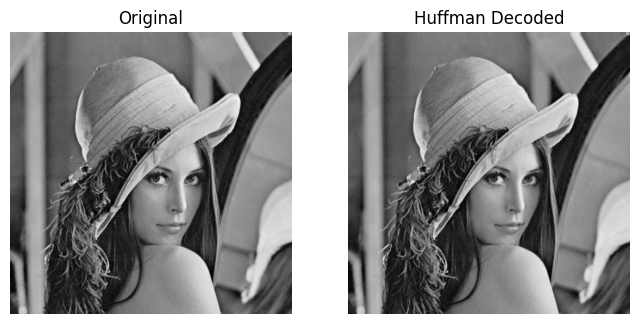

In [ ]:
from PIL import Image
import heapq
from collections import Counter
import matplotlib.pyplot as plt

# Huffman Node
class Node:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None
    def __lt__(self, other):
        return self.freq < other.freq

def huffman_coding(freq_dict):
    heap = [Node(sym, freq) for sym, freq in freq_dict.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    codes = {}
    def generate_codes(node, code=""):
        if node is None:
            return
        if node.symbol is not None:
            codes[node.symbol] = code
            return
        generate_codes(node.left, code + "0")
        generate_codes(node.right, code + "1")
    generate_codes(heap[0])
    return codes

def encode(pixels, codes):
    return "".join(codes[p] for p in pixels)

def decode(bitstring, codes, size):
    reverse_codes = {v: k for k, v in codes.items()}
    decoded_pixels = []
    code = ""
    for bit in bitstring:
        code += bit
        if code in reverse_codes:
            decoded_pixels.append(reverse_codes[code])
            code = ""
    return decoded_pixels[:size]

# Load grayscale image
img = Image.open("Lenna.png").convert("L")
pixels = list(img.getdata())
freq = Counter(pixels)

# Huffman
codes = huffman_coding(freq)
encoded = encode(pixels, codes)
decoded = decode(encoded, codes, len(pixels))
decoded_img = Image.new("L", img.size)
decoded_img.putdata(decoded)

# Stats
print("Original size (bits):", len(pixels) * 8)
print("Compressed size (bits):", len(encoded))
print("Compression ratio:", round(len(encoded) / (len(pixels) * 8), 3))

# Display images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(decoded_img, cmap='gray')
axs[1].set_title("Huffman Decoded")
for ax in axs:
    ax.axis("off")
plt.show()


Original size (bits): 2097152
Compressed size (bits): 1996720
Compression ratio: 0.952


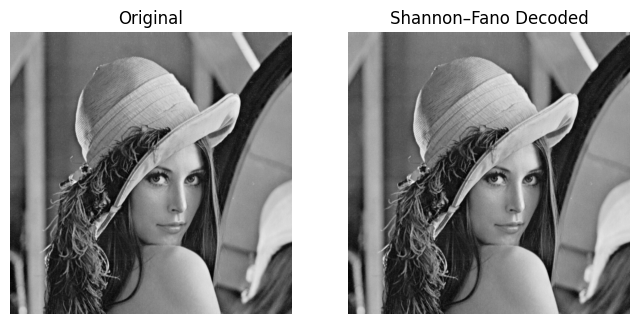

In [ ]:
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

def shannon_fano(freq_dict):
    symbols = list(freq_dict.items())
    symbols.sort(key=lambda x: x[1], reverse=True)
    codes = {sym: "" for sym, _ in symbols}

    def divide(start, end):
        if start >= end:
            return
        total = sum(freq for _, freq in symbols[start:end+1])
        acc = 0
        split = start
        for i in range(start, end+1):
            if acc + symbols[i][1] <= total / 2:
                acc += symbols[i][1]
                split = i
            else:
                break
        for i in range(start, split+1):
            codes[symbols[i][0]] += "0"
        for i in range(split+1, end+1):
            codes[symbols[i][0]] += "1"
        divide(start, split)
        divide(split+1, end)

    divide(0, len(symbols) - 1)
    return codes

def encode(pixels, codes):
    return "".join(codes[p] for p in pixels)

def decode(bitstring, codes, size):
    reverse_codes = {v: k for k, v in codes.items()}
    decoded_pixels = []
    code = ""
    for bit in bitstring:
        code += bit
        if code in reverse_codes:
            decoded_pixels.append(reverse_codes[code])
            code = ""
    return decoded_pixels[:size]

# Load grayscale image
img = Image.open("Lenna.png").convert("L")
pixels = list(img.getdata())
freq = Counter(pixels)

# Shannon–Fano
codes = shannon_fano(freq)
encoded = encode(pixels, codes)
decoded = decode(encoded, codes, len(pixels))
decoded_img = Image.new("L", img.size)
decoded_img.putdata(decoded)

# Stats
print("Original size (bits):", len(pixels) * 8)
print("Compressed size (bits):", len(encoded))
print("Compression ratio:", round(len(encoded) / (len(pixels) * 8), 3))

# Display images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(decoded_img, cmap='gray')
axs[1].set_title("Shannon–Fano Decoded")
for ax in axs:
    ax.axis("off")
plt.show()
